## 2️⃣ **Data Understanding**
**Objective:** Collect and explore the customer data to understand the key features affecting churn.

**Tasks:**
- Load and describe the dataset.
- Perform exploratory data analysis (EDA).
- Check for data quality issues (missing values, duplicates, etc.).


In [4]:
# ====================
# General Libraries
# ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
# ====================
# Statistical Analysis and Metrics
# ====================
from scipy.stats import shapiro, pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ====================
# Preprocessing and Feature Engineering
# ====================
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# ====================
# Data Splitting, Model Selection, and Cross-Validation
# ====================
from sklearn.model_selection import train_test_split, GridSearchCV

# ====================
# Machine Learning Models
# ====================
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# ====================
# Model Evaluation and Metrics
# ====================
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)

# ====================
# Imbalanced Learning
# ====================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline

# ====================
# Model Explainability
# ====================
import shap
import lime
import lime.lime_tabular

# ====================
# Saving and Loading Models
# ====================

import joblib


In [5]:
# ** Data Loading**
# File paths (update these paths if needed)
train_path = "churn-bigml-80.csv"
test_path = "churn-bigml-20.csv"

# Load the datasets
try:
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    print("Datasets loaded successfully.")
except Exception as e:
    print(f"Error loading datasets: {e}")

Datasets loaded successfully.


In [6]:
## **🔗  Concatenate Train and Test Datasets**
# Concatenate the two datasets into a single DataFrame
data = pd.concat([train_data, test_data], ignore_index=True)

# Display the shape of the combined dataset
print(f"Combined Data Shape: {data.shape}")


Combined Data Shape: (3333, 20)


In [7]:
## **📋 Preview Combined Dataset**
# Display the first 5 rows of the combined dataset
data.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:

data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [11]:
data.describe(include="object").T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411


In [12]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3333   │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0    ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Account length          │   0 │     0 │  101.1 │   39.82 │     1 │     74 │   101 │   127 │   243 │ ▁▅▇▅▁  │  │
│ │ Area code               │   0 │     0 │  437.2 │   42.37 │   408 │    408 │   415 │   510 │   510 │ ▇    ▃ │  │
│ │ Number vmail messages   │   0 │     0 │  8.099 │   13.69 │     0 │      0 │     0 │    20 │    51 │ ▇ ▁▁▁  │  │
│ │ Total day minutes       │   0 │     0 │  179.8 │   54.47 │     0 │  143.7 │ 179.4 │ 216.4 │ 350.8 │  ▂▇▇▃  │  │
│ │ Total day calls         │   0 │     0 │  100.4 │   20.07 │     0 │     87 │   101 │   114 │   165 │   ▃▇▅▁ │  │
│ │ Total day charge        │   0 │     0 │  30.56 │   9.259 │     0 │  24.43 │  30.5 │ 36.79 │ 59.64 │  ▂▇▇▃  │  │
│ │ Total eve minutes       │   0 │     0 │    201 │   50.71 │     0 │  166.6 │ 201.4 │ 235.3 │ 363.7 │  ▁▆▇▃  │  │
│ │ Total eve calls         │   0 │     0 │  100.1 │   19.92 │     0 │     87 │   100 │   114 │   170 │   ▃▇▃  │  │
│ │ Total eve charge        │   0 │     0 │  17.08 │   4.311 │     0 │  14.16 │ 17.12 │    20 │ 30.91 │  ▁▆▇▃  │  │
│ │ Total night minutes     │   0 │     0 │  200.9 │   50.57 │  23.2 │    167 │ 201.2 │ 235.3 │   395 │  ▂▇▇▁  │  │
│ │ Total night calls       │   0 │     0 │  100.1 │   19.57 │    33 │     87 │   100 │   113 │   175 │  ▃▇▇▂  │  │
│ │ Total night charge      │   0 │     0 │  9.039 │   2.276 │  1.04 │   7.52 │  9.05 │ 10.59 │ 17.77 │  ▂▇▇▁  │  │
│ │ Total intl minutes      │   0 │     0 │  10.24 │   2.792 │     0 │    8.5 │  10.3 │  12.1 │    20 │  ▂▆▇▂  │  │
│ │ Total intl calls        │   0 │     0 │  4.479 │   2.461 │     0 │      3 │     4 │     6 │    20 │  ▇▇▂▁  │  │
│ │ Total intl charge       │   0 │     0 │  2.765 │  0.7538 │     0 │    2.3 │  2.78 │  3.27 │   5.4 │  ▂▆▇▂  │  │
│ │ Customer service calls  │   0 │     0 │  1.563 │   1.315 │     0 │      1 │     1 │     2 │     9 │  ▇▃▃   │  │
│ └─────────────────────────┴─────┴───────┴────────┴─────────┴───────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━

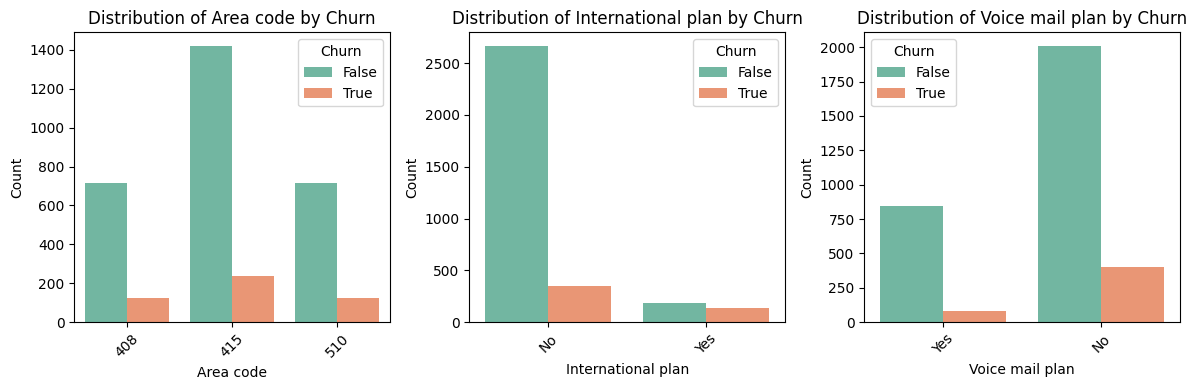

In [13]:
## **📊  Plot Categorical Features**
# List of categorical features in the dataset
categorical_features = ['Area code', 'International plan', 'Voice mail plan']

# Plot the distribution of each categorical feature
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of features
num_features = len(categorical_features)

# Calculate the number of rows and columns for subplots
ncols = 3
nrows = (num_features // ncols) + (num_features % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))

# Flatten the axes for iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, hue='Churn', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Churn')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


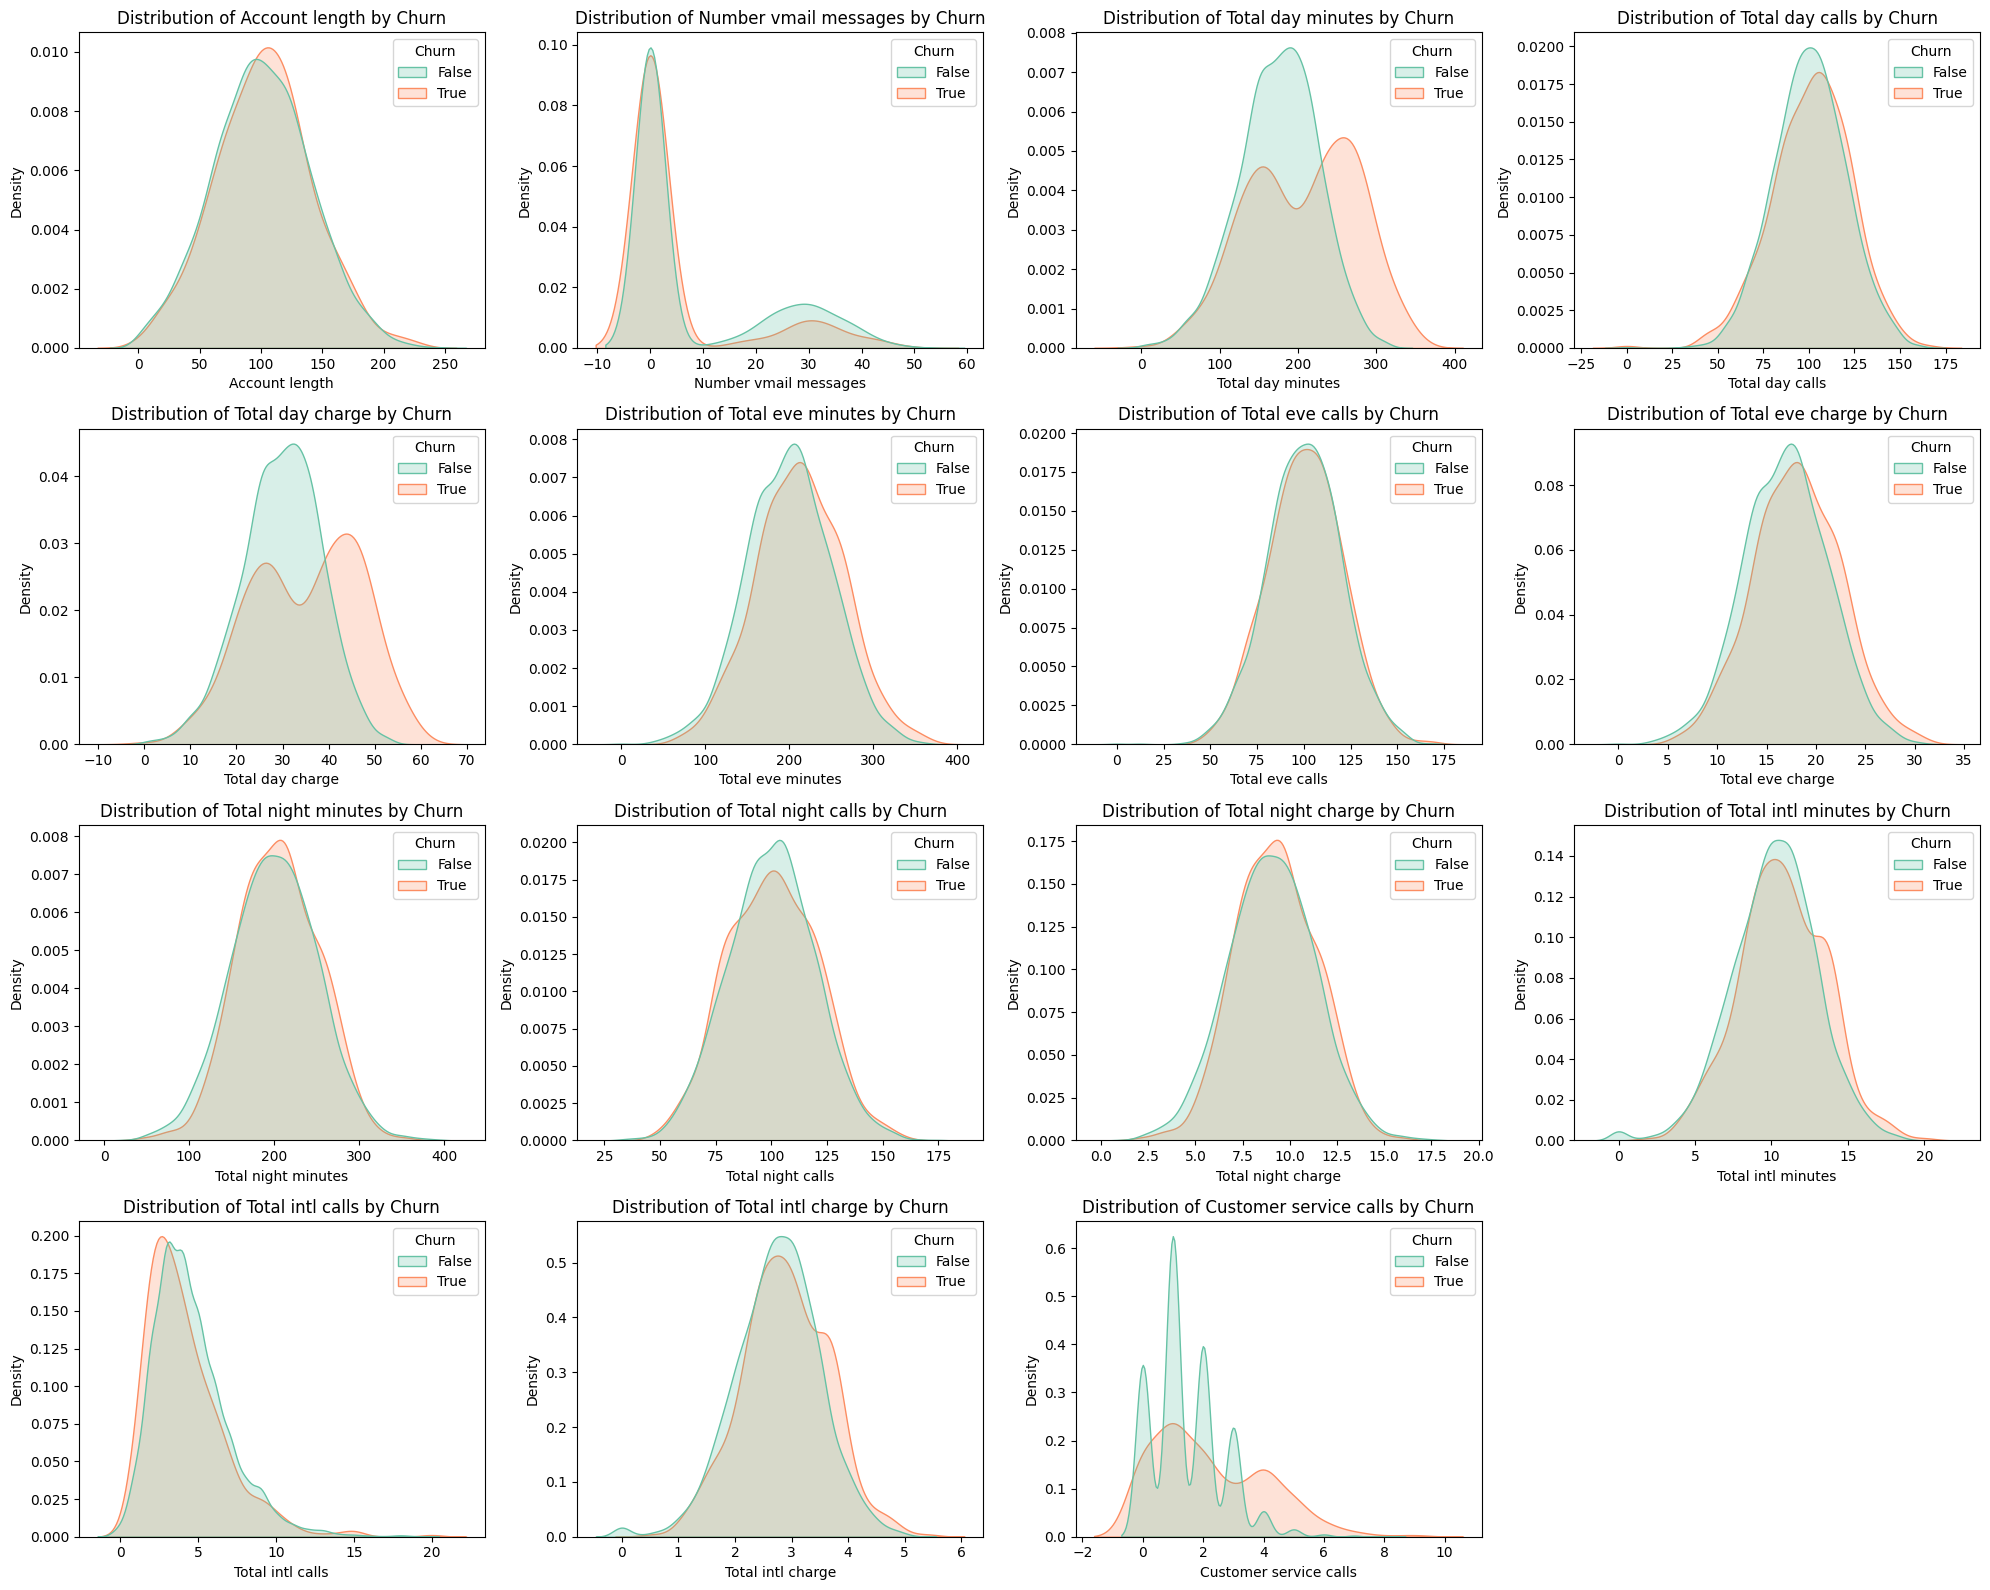

In [14]:
## **📉  Plot Numerical Features**
# List of numerical features in the dataset
numerical_features = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

# Calculate the number of features
num_features = len(numerical_features)

# Calculate the number of rows and columns for subplots
ncols = 4
nrows = (num_features // ncols) + (num_features % ncols > 0)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))

# Flatten the axes for iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=data, x=feature, hue='Churn', fill=True, common_norm=False, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Churn')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Remove unused subplots if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# 3️⃣ **Data Preparation**
**Objective:** Prepare the data for modeling.

**Tasks:**
- Clean missing and duplicate data.
- Normalize and encode categorical data.
- Engineer features .
- Split the data into training, validation, and testing sets.



In [15]:
## **🧹 Handle Duplicates**
print("\n🕵️‍♀️ Missing Values in Data:\n", data.isnull().sum())
# Remove duplicate rows
data = data.drop_duplicates()

# Print the new shape of the dataset
print("🗂️ Shape after Removing Duplicates:", data.shape)



🕵️‍♀️ Missing Values in Data:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
🗂️ Shape after Removing Duplicates: (3333, 20)


 **Outliers Analysis**
*Outliers are not removed in this analysis as they may contain valuable information about customer behavior. In churn prediction, outliers such as unusually high service calls or usage may indicate dissatisfied customers at risk of leaving. Removing these points could lead to the loss of critical insights, so they are retained to improve model accuracy and business impact.*  

 **Feature Analysis**
- **Account Length (243)**: Slightly higher than typical ranges (0-200) but possible for long-term customers.  
- **Area Code (510)**: Valid area code within the range of 200-999, commonly used in California, USA.  
- **Number of Voicemail Messages (51)**: Plausible as voicemail limits can be up to 100 messages on some carriers.  
- **Total Day Minutes (350.8)**: High but realistic, representing 6 hours of calls, feasible for heavy callers.  
- **Total Day Calls (165)**: Unusually high for personal use, possible outlier, but plausible for business lines.  
- **Total Day Charge (59.64)**: Consistent with Total Day Minutes, no anomaly detected.  
- **Total Evening Minutes (363.7)**: Similar to Total Day Minutes, high but possible for heavy call users.  
- **Total Evening Calls (170)**: Unusually high but plausible for business users or call centers.  
- **Total Evening Charge (30.91)**: Matches Total Evening Minutes, no inconsistency noted.  
- **Total Night Minutes (395.0)**: High but plausible, representing about 6.5 hours of calls.  
- **Total Night Calls (175)**: Possible outlier as personal users rarely make this many calls overnight.  
- **Total Night Charge (17.77)**: Consistent with Total Night Minutes, no anomaly detected.  
- **Total International Minutes (20.0)**: Realistic as international calls are often short due to high costs.  
- **Total International Calls (20)**: Plausible for users with frequent overseas contacts.  
- **Total International Charge (5.40)**: Matches Total International Minutes, no anomaly detected.  
- **Customer Service Calls (9)**: High but plausible for customers with billing or technical issues.  


**Create New Features**

In [16]:
# Customer Engagement Score: Combine account length and usage metrics
data['Engagement_Score'] = (data['Account length'] *
                            (data['Total day minutes'] + data['Total night minutes'] + data['Total intl minutes'])) / 3

# Total Charges: Sum of all charges
data['Total_Charges'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']

# Service Utilization score: Combine the services used by the client
data['Service_Utilization'] = data[['International plan', 'Voice mail plan', 'Customer service calls']].apply(
    lambda x: x.astype(bool).sum(), axis=1)

# Total day charge per minute (derived from Total day charge and Total day minutes)
data['Total_day_charge_per_minute'] = data['Total day charge'] / data['Total day minutes']

# Total eve charge per minute (derived from Total eve charge and Total eve minutes)
data['Total_eve_charge_per_minute'] = data['Total eve charge'] / data['Total eve minutes']

# Total night charge per minute (derived from Total night charge and Total night minutes)
data['Total_night_charge_per_minute'] = data['Total night charge'] / data['Total night minutes']

# Total intl charge per minute (derived from Total intl charge and Total intl minutes)
data['Total_intl_charge_per_minute'] = data['Total intl charge'] / data['Total intl minutes']

print("Feature Engineering Completed.")


Feature Engineering Completed.


**Encoding Categorical Features**

In [17]:

le = LabelEncoder()

# Encode 'State' as a numerical label
data['State'] = le.fit_transform(data['State'])

# Encode 'Area code' as a numerical label
data['Area code'] = le.fit_transform(data['Area code'])

# One-Hot Encode binary categorical features
columns_to_encode = ['International plan', 'Voice mail plan']
data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)


In [18]:
# Define numerical features to be used for further analysis or modeling
numerical_features = [
    'Engagement_Score', 'Total_Charges', 'Service_Utilization', 'Total_day_charge_per_minute',
    'Total_eve_charge_per_minute', 'Total_night_charge_per_minute', 'Total_intl_charge_per_minute',
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]
print("Numerical features for analysis defined successfully.")


Numerical features for analysis defined successfully.


**📊 Check Normality of Each Feature**

In [19]:
# List to store results of Shapiro-Wilk test
results = []

# Check normality for each feature using Shapiro-Wilk test
for feature in numerical_features:
    stat, p = shapiro(data[feature])
    results.append({
        'Feature': feature,
        'Shapiro-Wilk Statistic': stat,
        'p-value': p,
        'Gaussian-Like': p > 0.05  # True if p > 0.05
    })

# Convert results to DataFrame for analysis
normality_results = pd.DataFrame(results)

# Display summary of normality test results
normality_results[['Feature', 'p-value', 'Gaussian-Like']]


,Feature,p-value,Gaussian-Like
0,Engagement_Score,4.001491e-16,False
1,Total_Charges,8.742765e-01,True
2,Service_Utilization,1.112138e-70,False
3,Total_day_charge_per_minute,NaN,False
4,Total_eve_charge_per_minute,NaN,False
5,Total_night_charge_per_minute,3.166722e-24,False
6,Total_intl_charge_per_minute,NaN,False
7,Account length,1.156471e-03,False
8,Number vmail messages,3.449436e-65,False
9,Total day minutes,6.401066e-01,True


In [20]:
## **⚙️ Apply Feature Transformations**
# Apply transformations based on normality test results
for _, row in normality_results.iterrows():
    feature = row['Feature']
    if row['Gaussian-Like']:
        # Apply standardization if Gaussian-like
        data[feature] = StandardScaler().fit_transform(data[[feature]])
    else:
        # Apply normalization otherwise
        data[feature] = MinMaxScaler().fit_transform(data[[feature]])

print("Feature preprocessing complete. Summary of transformations:")

Feature preprocessing complete. Summary of transformations:


**Feature Selection for Customer Churn Prediction**

**Feature Selection Explanation:**
  In this step, we used Pearson Correlation to remove redundant and irrelevant
features.

- We dropped features with a correlation of 1.0 with other features, as these features carry identical information.
- When two features were perfectly correlated, we kept the feature with the strongest relationship to Churn.
- Features with an absolute correlation with Churn less than 0.05 were removed, as they provide minimal predictive power.
-> This method ensures we have a smaller, more relevant set of features for modeling.

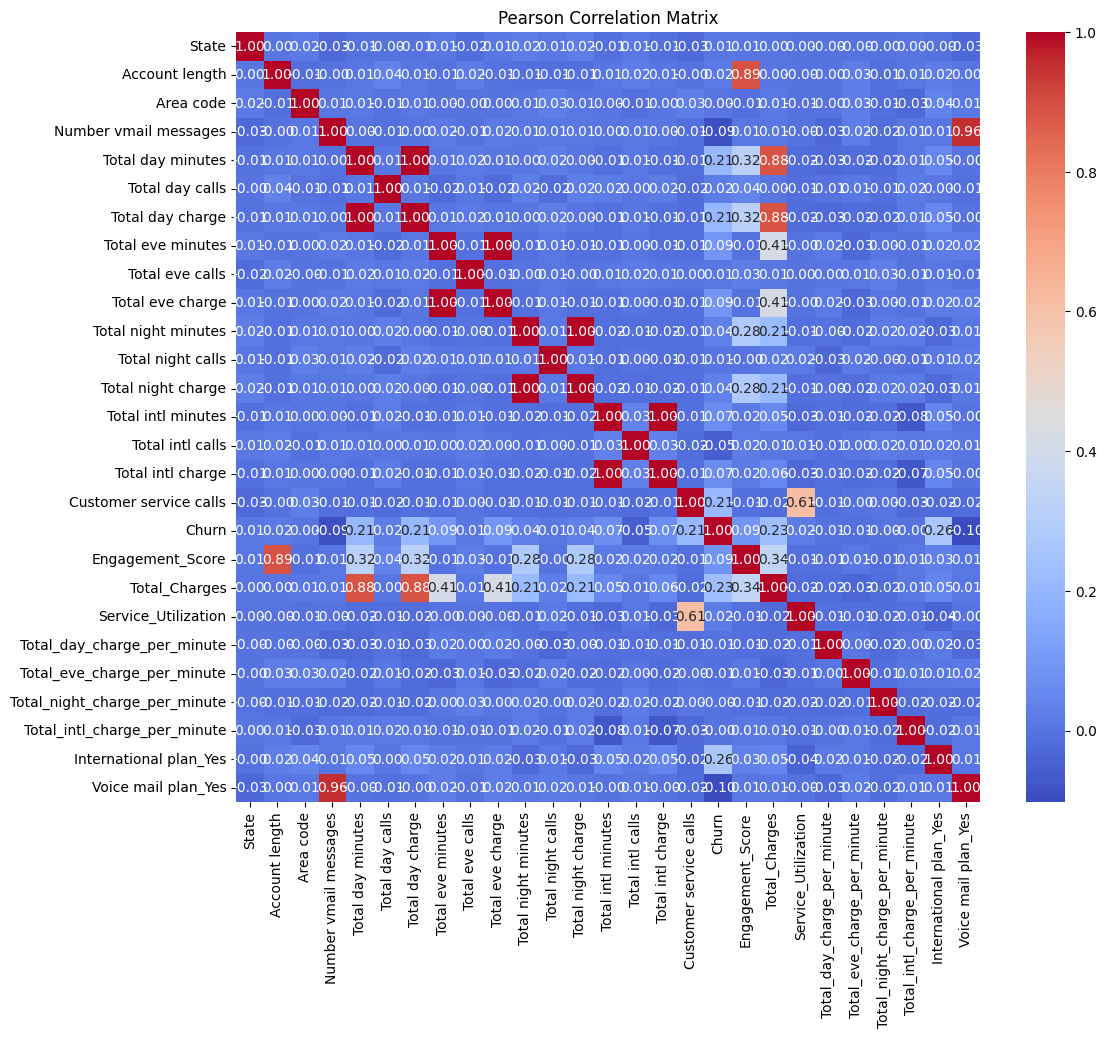

In [21]:
# 1️⃣ Calculate Pearson Correlation Matrix
correlation_matrix = data.corr(method='pearson')

# 2️⃣ Visualize the Correlation Matrix using a Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Pearson Correlation Matrix')
plt.show()


/tmp/ipykernel_862/1334652223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_churn.index, y=corr_with_churn, palette='Paired')


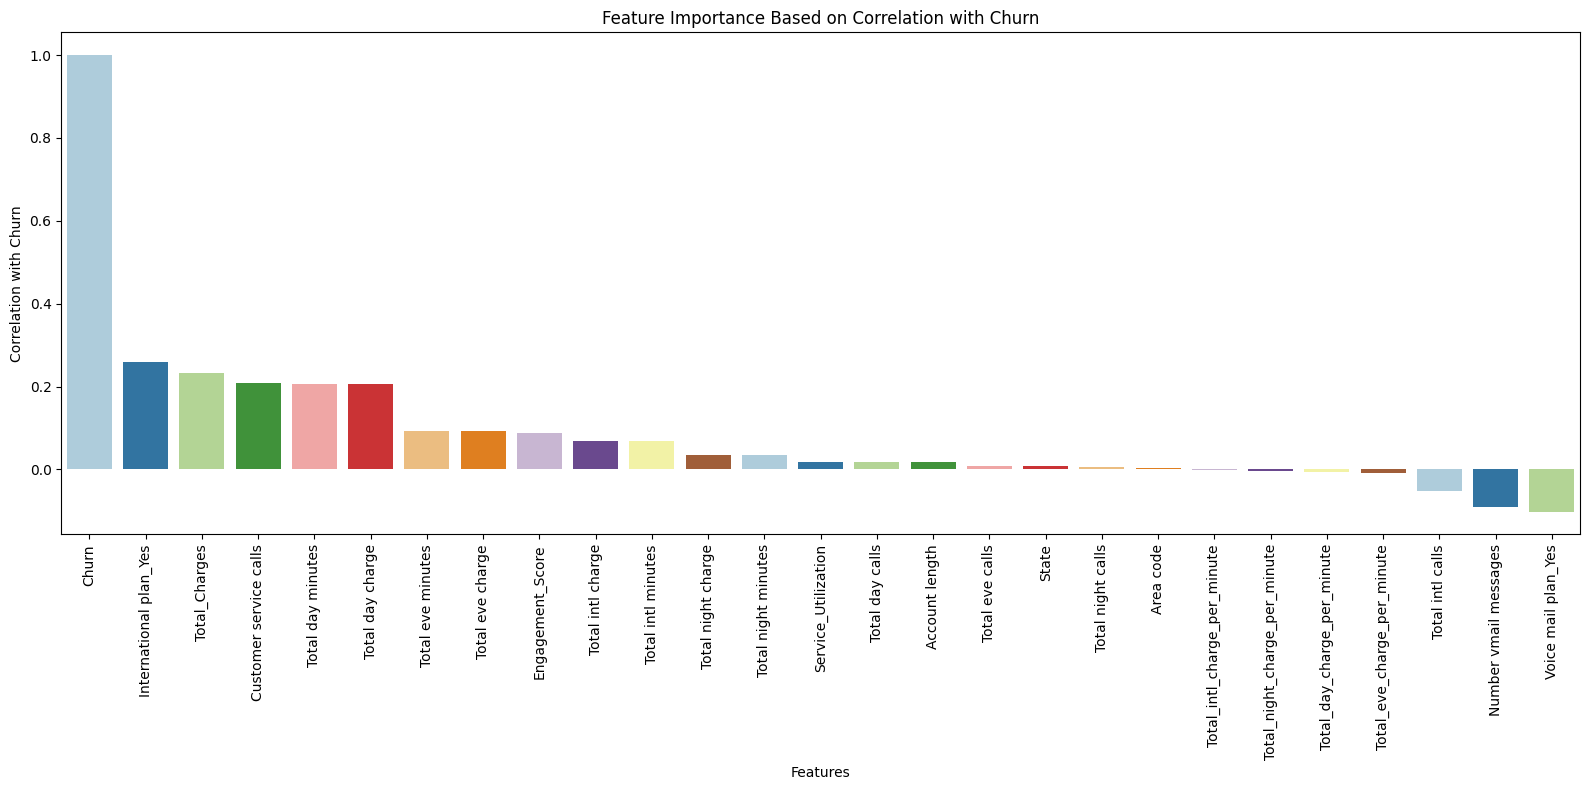

In [22]:
# Calculate the correlation of all features with the 'Churn' column
corr_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Plot the correlations as a barplot
plt.figure(figsize=(16, 8))
sns.barplot(x=corr_with_churn.index, y=corr_with_churn, palette='Paired')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title to the plot
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Feature Importance Based on Correlation with Churn')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [23]:

# 3️⃣ Extract Upper Triangle of Correlation Matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 4️⃣ Identify Pairs of Features with High Correlation (correlation >0.99)
high_correlation_pairs = [(row, col) for col in upper_triangle.columns for row in upper_triangle.index
                          if upper_triangle.loc[row, col] >0.99]

# 5️⃣ Drop one feature from each pair with perfect correlation
dropped_features = []

for feature1, feature2 in high_correlation_pairs:
    corr_with_churn_1 = abs(correlation_matrix.loc['Churn', feature1])
    corr_with_churn_2 = abs(correlation_matrix.loc['Churn', feature2])

    # Drop the feature with lower correlation with the Churn target
    if corr_with_churn_1 < corr_with_churn_2:
        dropped_features.append(feature1)
    else:
        dropped_features.append(feature2)

# Remove duplicates from dropped features
dropped_features = list(set(dropped_features))

print("\nFeatures dropped due to high inter-feature correlation:")
print(dropped_features)

# 6️⃣ Drop Features with Low Correlation with 'Churn' (|r| < 0.05)
low_corr_features = correlation_matrix['Churn'][abs(correlation_matrix['Churn']) < 0.05].index.tolist()
print("\nFeatures dropped due to low correlation with 'Churn' (|r| < 0.05):")
print(low_corr_features)

# Combine both lists of dropped features
all_dropped_features = list(set(dropped_features + low_corr_features))
print("\nAll features to be dropped (total):")
print(all_dropped_features)

# Drop these features from the dataset
data = data.drop(columns=all_dropped_features)

print(f"\nShape of data after feature selection: {data.shape}")



Features dropped due to high inter-feature correlation:
['Total eve charge', 'Total intl minutes', 'Total day charge', 'Total night minutes']

Features dropped due to low correlation with 'Churn' (|r| < 0.05):
['State', 'Account length', 'Area code', 'Total day calls', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total night charge', 'Service_Utilization', 'Total_day_charge_per_minute', 'Total_eve_charge_per_minute', 'Total_night_charge_per_minute', 'Total_intl_charge_per_minute']

All features to be dropped (total):
['Total_day_charge_per_minute', 'Total eve charge', 'Total_eve_charge_per_minute', 'Total night calls', 'Account length', 'Total night charge', 'State', 'Service_Utilization', 'Total_night_charge_per_minute', 'Total_intl_charge_per_minute', 'Area code', 'Total eve calls', 'Total intl minutes', 'Total day calls', 'Total day charge', 'Total night minutes']

Shape of data after feature selection: (3333, 11)


/tmp/ipykernel_862/2300771121.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remaining_corr_with_churn.index, y=remaining_corr_with_churn, palette='viridis')


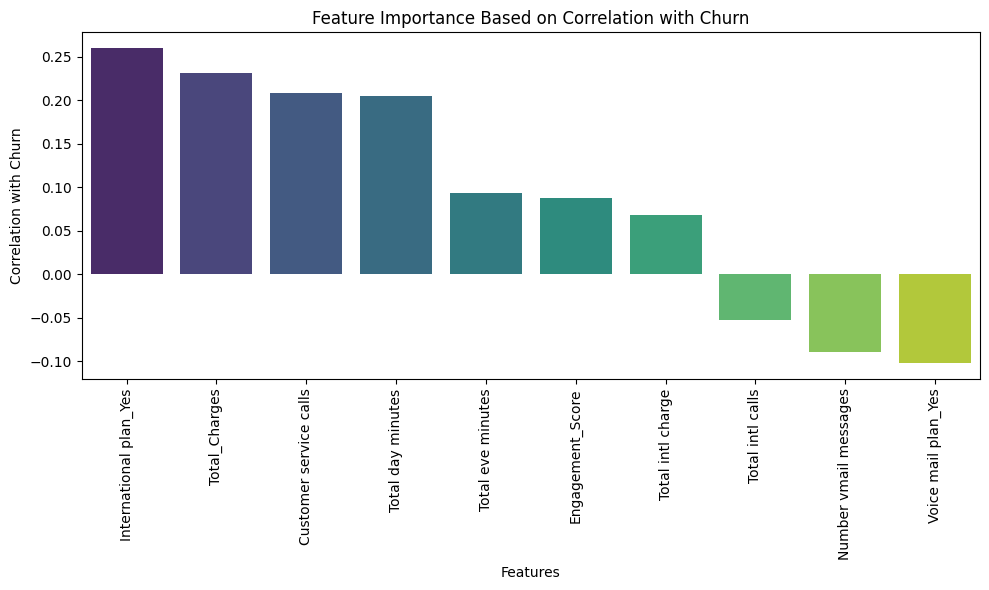


Remaining Features and their Correlation with Churn:
International plan_Yes    0.259852
Total_Charges             0.231549
Customer service calls    0.208750
Total day minutes         0.205151
Total eve minutes         0.092796
Engagement_Score          0.087960
Total intl charge         0.068259
Total intl calls         -0.052844
Number vmail messages    -0.089728
Voice mail plan_Yes      -0.102148
Name: Churn, dtype: float64


In [24]:

# 7️⃣ List the remaining features after dropping
remaining_features = [feature for feature in correlation_matrix.columns if feature not in all_dropped_features]

# Calculate the correlation of remaining features with 'Churn'
remaining_corr_with_churn = correlation_matrix['Churn'][remaining_features].sort_values(ascending=False)
remaining_corr_with_churn = remaining_corr_with_churn.drop('Churn')
# Plot the correlations as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=remaining_corr_with_churn.index, y=remaining_corr_with_churn, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title to the plot
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Feature Importance Based on Correlation with Churn')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Print remaining features and their correlation with 'Churn'
print("\nRemaining Features and their Correlation with Churn:")
print(remaining_corr_with_churn)

**Split Data**

In [25]:

X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (2666, 10)
Testing data shape: (667, 10)


**Apply SMOTE and ENN for handle over-sampling the minority**



/tmp/ipykernel_862/2747059607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


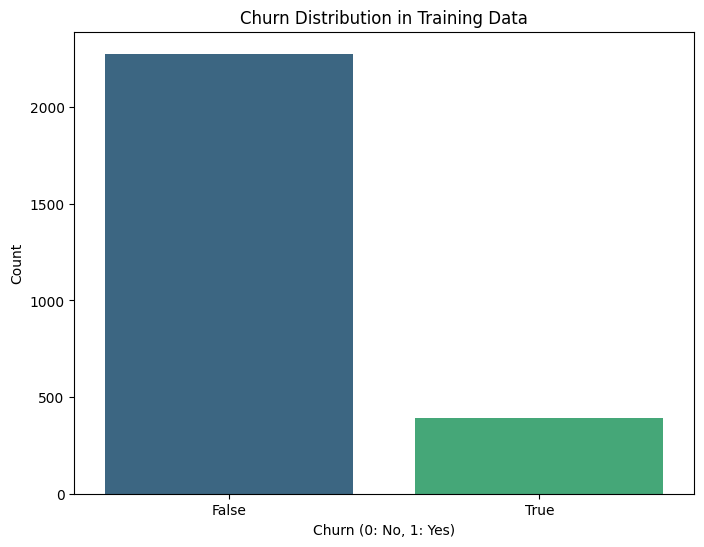

In [26]:

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Churn Distribution in Training Data')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [27]:

# 1️⃣ SMOTE: Apply SMOTE for over-sampling the minority class in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)

# 2️⃣ ENN: Apply Edited Nearest Neighbors (ENN) for under-sampling the noisy instances
enn = EditedNearestNeighbours()

# 3️⃣ Create a pipeline for applying SMOTE followed by ENN
pipeline = Pipeline([('smote', smote), ('enn', enn)])

# Fit and transform the training data
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

# Print the shape of the new balanced dataset
print(f"Original training set shape: {X_train.shape}")
print(f"Balanced training set shape: {X_train_balanced.shape}")

# Optionally, check the class distribution before and after applying SMOTE and ENN
print(f"Class distribution before balancing:\n{y_train.value_counts()}")
print(f"Class distribution after balancing:\n{y_train_balanced.value_counts()}")
X_train = X_train_balanced
y_train = y_train_balanced
X_train.head()

Original training set shape: (2666, 10)
Balanced training set shape: (4416, 10)
Class distribution before balancing:
Churn
False    2276
True      390
Name: count, dtype: int64
Class distribution after balancing:
Churn
False    2276
True     2140
Name: count, dtype: int64


,Number vmail messages,Total day minutes,Total eve minutes,Total intl calls,Total intl charge,Customer service calls,Engagement_Score,Total_Charges,International plan_Yes,Voice mail plan_Yes
0,0.000000,1.010387,-1.184871,0.25,0.475926,0.111111,0.358567,0.400950,False,False
1,0.000000,-0.405351,1.925200,0.15,0.690741,0.111111,0.328134,0.593318,False,False
2,0.000000,-0.557759,-0.088359,0.15,0.744444,0.111111,0.198362,-0.371381,False,False
3,0.000000,-1.002128,0.106883,0.40,0.414815,0.000000,0.272389,-1.197041,True,False
4,0.784314,-0.699149,1.327640,0.35,0.425926,0.000000,0.236766,0.058115,False,True


# 4️⃣ **Modeling**



## **DSO 1 ,2**

**Neural Network Model (MLPClassifier)**

In [32]:

nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_best_model = nn_model


## **DSO 3**

**C.A.H**


   Number vmail messages  Total day minutes  Total eve minutes  \
0               0.490196           1.566767          -0.070610   
1               0.509804          -0.333738          -0.108080   
2               0.000000           1.168304          -1.573383   
3               0.000000           2.196596          -2.742865   
4               0.000000          -0.240090          -1.038932   

   Total intl calls  Total intl charge  Customer service calls  Churn  \
0              0.15           0.500000                0.111111  False   
1              0.15           0.685185                0.111111  False   
2              0.25           0.609259                0.000000  False   
3              0.35           0.329630                0.222222  False   
4              0.15           0.505556                0.333333  False   

   Engagement_Score  Total_Charges  International plan_Yes  \
0          0.612583       1.534209                   False   
1          0.422746      -0.019975      

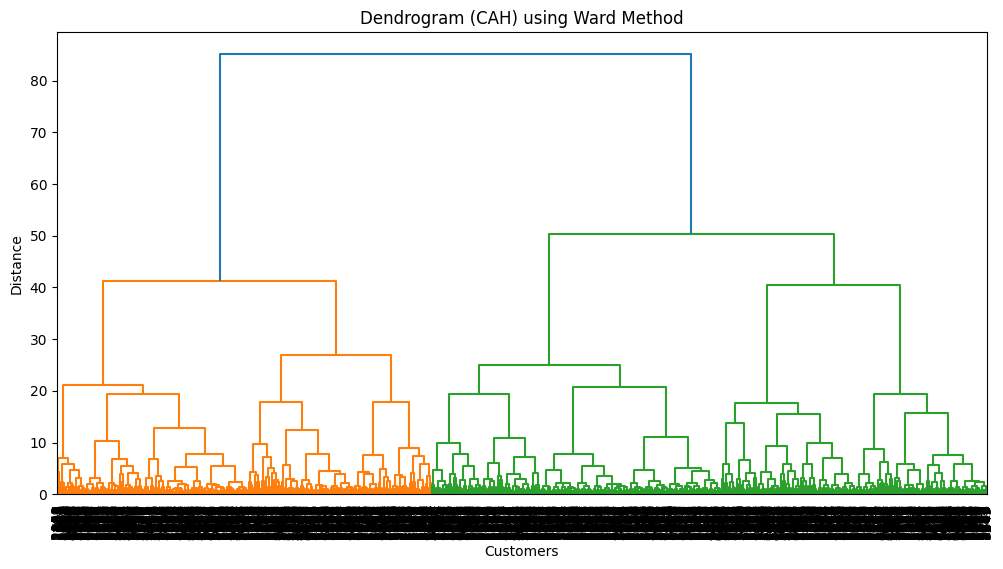


📊 **Cluster Analysis Summary**:
        Importance_Score                      Rank
                    mean       max       min count
Cluster                                           
1              -0.387698  0.333882 -1.781153  1344
2               0.195322  1.239288 -0.573565  1039
3               0.595020  1.837419 -0.141887   950

📢 **Top 10 Important Clients in the Most Important Cluster**:
      Cluster  Importance_Score  Total_Charges  Engagement_Score  \
780         3          1.837419       3.495033          0.373747   
296         3          1.798960       3.118868          0.872496   
2668        3          1.696806       3.127438          0.739918   
2114        3          1.648010       2.920785          0.699466   
725         3          1.644676       2.731274          0.930131   
485         3          1.621852       2.953164          0.632382   
2569        3          1.594406       2.886502          0.577926   
2087        3          1.565925       2.811269        

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 1️⃣ Load and use the already scaled data
df = data.copy()  # Make sure 'data' is your loaded dataset
print(df.head())

selected_features = ['Number vmail messages', 'Total day minutes', 'Total eve minutes',
                     'Total intl calls', 'Total intl charge', 'Customer service calls',
                     'Engagement_Score', 'Total_Charges', 'International plan_Yes', 'Voice mail plan_Yes']

X_scaled = df[selected_features]  # Directly using the scaled features

# ---------------------------------
# ⚙️ 2️⃣ Perform CAH (Hierarchical Clustering)
# ---------------------------------
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram to visualize the number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram (CAH) using Ward Method')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Extract cluster labels for each customer
n_clusters = 3  # 🔥 Choose the optimal number of clusters (based on dendrogram)
df['Cluster'] = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# ---------------------------------
# ⚙️ 3️⃣ Calculate Importance for Each Client
# ---------------------------------
# Calculate an "importance score" for each customer
df['Importance_Score'] = (
    df['Total_Charges'] * 0.5 +  # High revenue = high importance
    df['Engagement_Score'] * 0.3 +  # High engagement = high importance
    df['Customer service calls'] * -0.2  # More service calls = lower importance
)

# Rank clients in each cluster based on the importance score
df['Rank'] = df.groupby('Cluster')['Importance_Score'].rank(ascending=False)

# ---------------------------------
# ⚙️ 4️⃣ Identify Most Important Cluster
# ---------------------------------
# Analyze each cluster and find the cluster with the highest mean importance score
cluster_analysis = df.groupby('Cluster').agg({
    'Importance_Score': ['mean', 'max', 'min'],
    'Rank': 'count'
})

# Identify the cluster with the highest mean importance
most_important_cluster = cluster_analysis['Importance_Score']['mean'].idxmax()

# Print summary of cluster analysis
print("\n📊 **Cluster Analysis Summary**:")
print(cluster_analysis)

# Flag the most important cluster in the dataset
df['High_Importance_Cluster'] = (df['Cluster'] == most_important_cluster).astype(int)

# ---------------------------------
# ⚙️ 5️⃣ Identify Top Clients
# ---------------------------------
# Get the top 10 most important clients from the most important cluster
important_clients = df[df['High_Importance_Cluster'] == 1].sort_values(by='Importance_Score', ascending=False).head(10)

print("\n📢 **Top 10 Important Clients in the Most Important Cluster**:")
print(important_clients[['Cluster', 'Importance_Score', 'Total_Charges', 'Engagement_Score', 'Customer service calls']])




# 5️⃣ **Evaluation**
**Objective:** Evaluate model performance and interpret results.

**Tasks:**
- Validate model performance on the test set.
- Use metrics like accuracy, precision, recall, F1-score, and AUC-ROC.
- Review feature importance (using SHAP, LIME).
- Choice best model for deployment

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of models and their names
models = [svm_best_model, logreg_best_model, rf_best_model, gbm_best_model, nn_best_model]
model_names = ['SVM', 'Logistic Regression', 'Random Forest', 'GBM', 'Neural Network']

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    try:
        # Predict using the model
        y_pred = model.predict(X_test)

        # Check if predict_proba exists, if not, use decision_function if available
        if hasattr(model, 'predict_proba'):
            y_probs = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_probs = model.decision_function(X_test)
        else:
            y_probs = None

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_probs) if y_probs is not None else 'N/A'

        return {
            'Model': model.__class__.__name__,
            'Accuracy': round(accuracy, 4),
            'Precision': round(precision, 4),
            'Recall': round(recall, 4),
            'F1 Score': round(f1, 4),
            'AUC-ROC': round(auc, 4) if auc != 'N/A' else 'N/A'
        }

    except Exception as e:
        print(f"Error while evaluating {model.__class__.__name__}: {e}")
        return {
            'Model': model.__class__.__name__,
            'Accuracy': 'Error',
            'Precision': 'Error',
            'Recall': 'Error',
            'F1 Score': 'Error',
            'AUC-ROC': 'Error'
        }

# Evaluate all models and collect the results
results = []
for model, name in zip(models, model_names):
    model_result = evaluate_model(model, X_test, y_test)
    model_result['Model'] = name  # Set model name for clarity
    results.append(model_result)

# Create a DataFrame to display the results as a table
results_df = pd.DataFrame(results)
print("\n🔍 **Model Performance Table**")
display(results_df)



🔍 **Model Performance Table**


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,SVM,0.9220,0.6952,0.7849,0.7374,0.8808
1,Logistic Regression,0.7931,0.3684,0.6774,0.4773,0.8039
2,Random Forest,0.9760,1.0000,0.8280,0.9059,0.9014
3,GBM,0.9760,1.0000,0.8280,0.9059,0.8953
4,Neural Network,0.9310,0.7282,0.8065,0.7653,0.8862


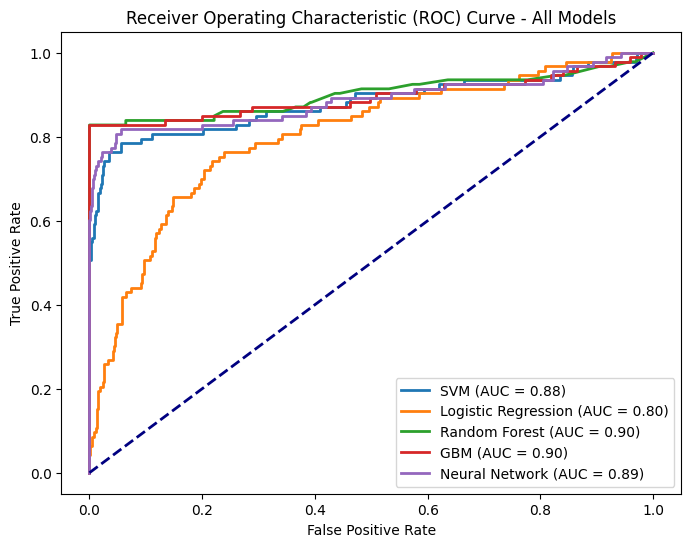

In [35]:
# Create a dictionary to store evaluation metrics
model_metrics = {}

# Function to calculate and plot ROC curve
def plot_all_roc_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model, name in zip(models, model_names):
        # Predict probabilities
        y_probs = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Add plot details
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - All Models')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curves for all models in one plot
plot_all_roc_curves(models, model_names, X_test, y_test)

Accuracy: 0.9760
Precision: 1.0000
Recall: 0.8280
F1 Score: 0.9059
AUC-ROC: 0.8953

Evaluation Metrics:
   Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  0.976012        1.0  0.827957  0.905882  0.895321


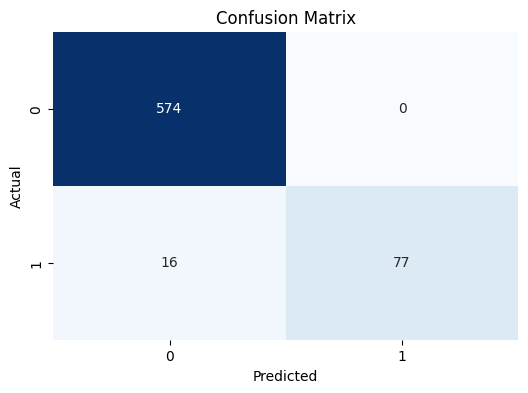


Feature Importance:
                  Feature  Importance
7           Total_Charges    0.268723
5  Customer service calls    0.216880
8  International plan_Yes    0.129507
1       Total day minutes    0.116667
3        Total intl calls    0.084942
2       Total eve minutes    0.051536
4       Total intl charge    0.051466
6        Engagement_Score    0.035738
0   Number vmail messages    0.029064
9     Voice mail plan_Yes    0.015478


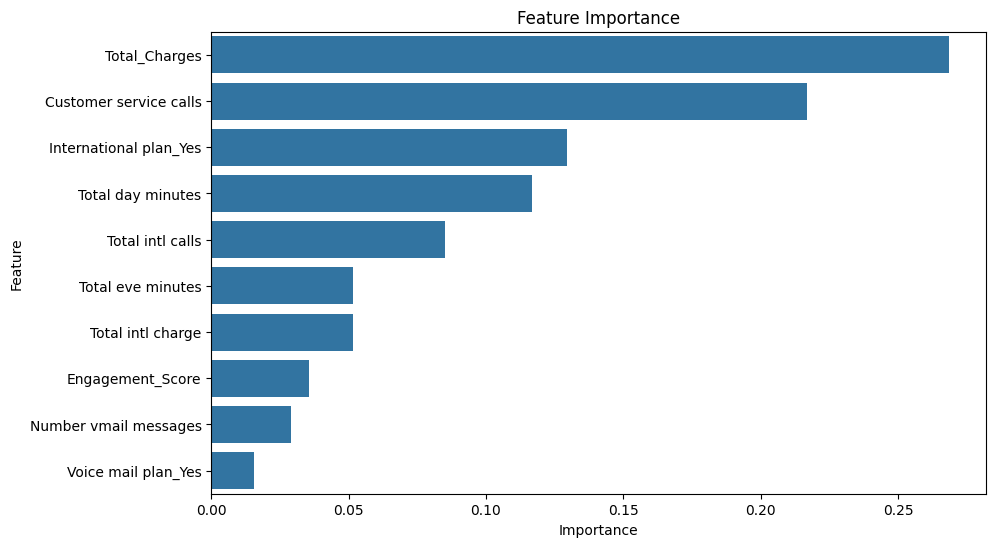

In [36]:
# prompt: generate all evalution for best model (random forest )

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Predict on the test set
y_pred = gbm_best_model.predict(X_test)

# Predict probabilities (for AUC-ROC)
y_probs = gbm_best_model.predict_proba(X_test)[:, 1]


def evaluate_model(y_true, y_pred, y_probs):
    """Calculates and prints various evaluation metrics for a model."""

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)


    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

    # Create a dictionary to store evaluation metrics
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc
    }

    return metrics

# Evaluate the Random Forest model
rf_metrics = evaluate_model(y_test, y_pred, y_probs)

# Create a DataFrame for better presentation (optional)
metrics_df = pd.DataFrame([rf_metrics])
print("\nEvaluation Metrics:")
print(metrics_df)

# Further analysis: Confusion Matrix, Feature Importance

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = rf_best_model.feature_importances_
feature_names = X_test.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

**Review Feature Importance Using SHAP**


Calculating SHAP values...

SHAP Summary Plot for Gradient Boosting Model:


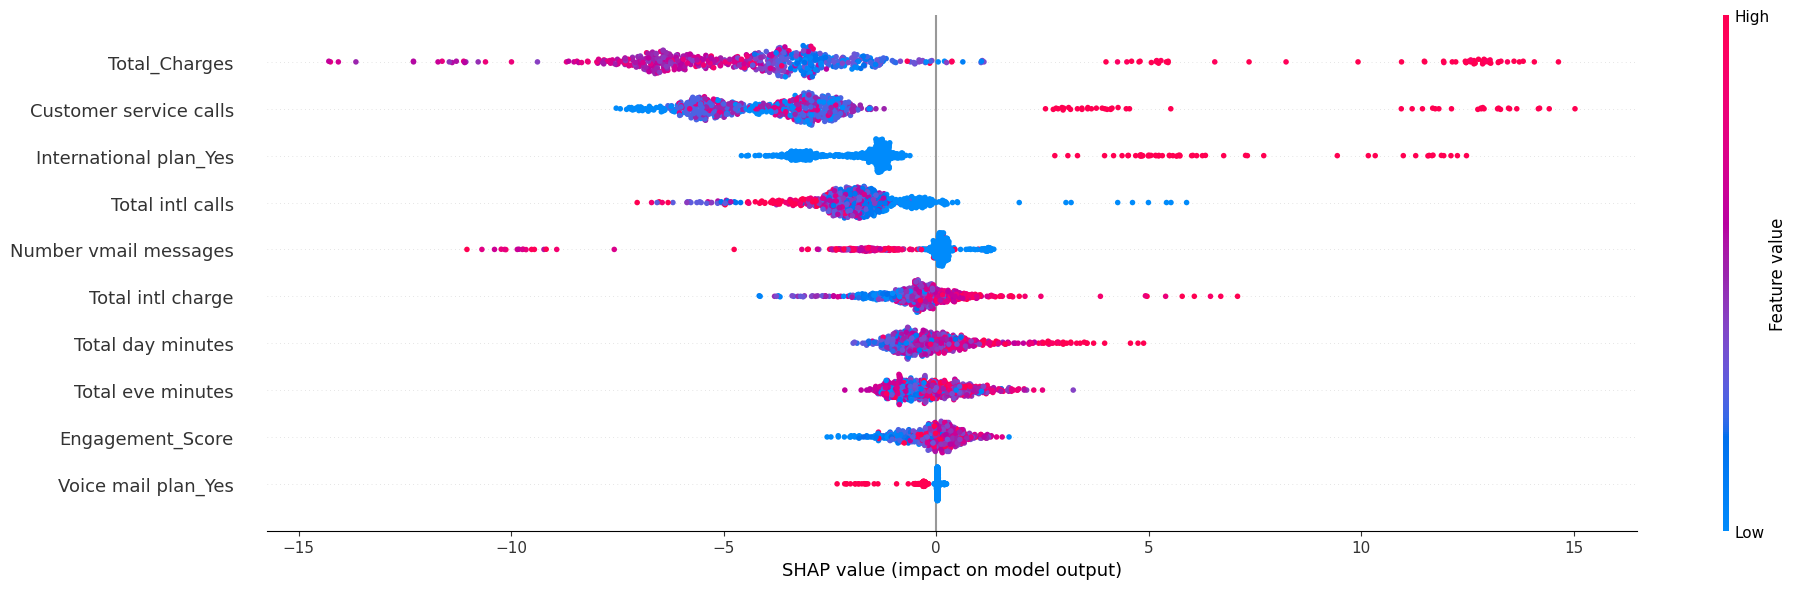


SHAP Bar Plot for Gradient Boosting Model:


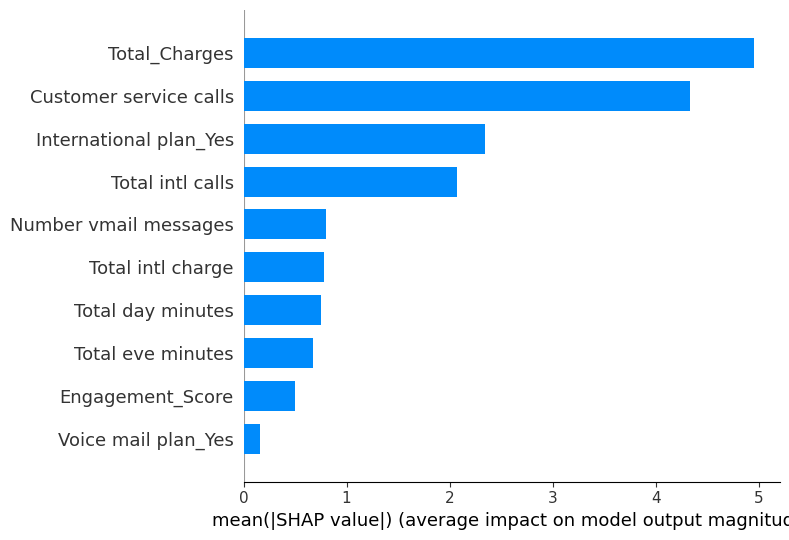

In [37]:


def visualize_shap_values(model, name, X_test, feature_names):
    """
    Visualizes SHAP values for a given model using summary and bar plots.

    Args:
        model (object): Trained tree-based model (e.g., GradientBoostingClassifier).
        name (str): Name of the model for labeling the plots.
        X_test (pd.DataFrame or np.ndarray): Test features to compute SHAP values.
        feature_names (list): Names of the features in the dataset.
    """
    try:
        print("\nCalculating SHAP values...")

        # Ensure input is a DataFrame for SHAP compatibility
        if not isinstance(X_test, pd.DataFrame):
            X_test = pd.DataFrame(X_test, columns=feature_names)

        # Initialize SHAP explainer for tree-based models
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)

        # SHAP Summary Plot
        print(f"\nSHAP Summary Plot for {name}:")
        plt.figure(figsize=(20, 6))  # Adjust figure size for better visualization
        shap.summary_plot(
            shap_values,
            X_test,
            feature_names=feature_names,
            show=False,
            plot_size=(20, 6)  # Customize plot size
        )
        plt.tight_layout()
        plt.show()

        # SHAP Bar Plot
        print(f"\nSHAP Bar Plot for {name}:")
        plt.figure(figsize=(20, 6))  # Adjust figure size for better visualization
        shap.summary_plot(
            shap_values,
            X_test,
            feature_names=feature_names,
            plot_type="bar",
            show=False
        )
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error while generating SHAP plots for {name}: {e}")

# Example usage
visualize_shap_values(gbm_best_model, "Gradient Boosting Model", X_test, feature_names=X_test.columns.tolist())


**Review Feature Importance Using LIME**

Explaining instance at index 523 (True label: False)
LIME Feature Importance for RF (Instance 523):


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


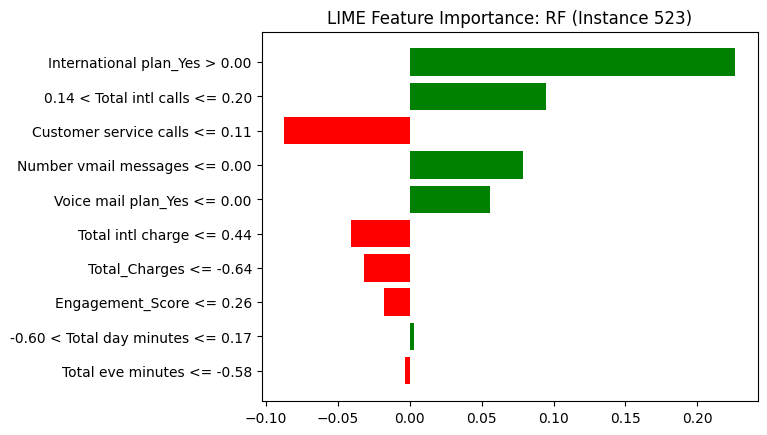

In [38]:

# Function to plot LIME feature importance
def plot_lime_feature_importance(model, model_name, X_train, X_test, y_train, y_test):
    """
    Plots the LIME feature importance for a randomly selected instance from the test set.

    Args:
        model: The trained classification model (e.g., RandomForest, XGBoost, GBM, etc.).
        model_name: The name of the model (for labeling the plot).
        X_train: The training data as a DataFrame or NumPy array (used to train the explainer).
        X_test: The test data as a DataFrame or NumPy array (used to select a random instance to explain).
        y_train: The training labels (not used directly in LIME, but optional for context).
        y_test: The test labels (optional, used to display the actual label of the instance).
    """
    # Ensure X_train is a NumPy array if it is a DataFrame
    X_train_np = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
    X_test_np = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

    # Create the LimeTabularExplainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train_np,
        mode="classification",
        feature_names=X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])],
        class_names=['Class 0', 'Class 1'],  # Adjust class names according to your use case
        discretize_continuous=True  # Discretize continuous features for better interpretability
    )

    # Select a random instance to explain from X_test
    i = np.random.randint(0, X_test.shape[0])
    instance_to_explain = X_test_np[i]
    true_label = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]

    print(f"Explaining instance at index {i} (True label: {true_label})")

    # Generate LIME explanation for the selected instance
    exp = explainer.explain_instance(
        data_row=instance_to_explain,
        predict_fn=model.predict_proba,  # Pass the model's predict_proba function
        num_features=10  # Show 10 most important features
    )

    # Plot the explanation
    print(f"LIME Feature Importance for {model_name} (Instance {i}):")
    exp.as_pyplot_figure()
    plt.title(f"LIME Feature Importance: {model_name} (Instance {i})")
    plt.show()
# Plot LIME feature importance for GBM
plot_lime_feature_importance(rf_best_model, 'RF', X_train, X_test, y_train, y_test)


### Strategic Insights

#### Enhancing Customer Retention
1. **Cost Optimization**:  
   - Offer discounts or loyalty rewards for customers with high international call usage.  
   - Introduce flexible plans to reduce the burden of high total charges.  

2. **Improved Customer Experience**:  
   - Strengthen customer support to reduce the frequency of service calls.  
   - Proactively address pain points for high-risk segments to enhance satisfaction.  

3. **Personalized Engagement**:  
   - Leverage data to create tailored offers for customers based on usage patterns.  
   - Provide exclusive benefits to highly engaged or long-term customers to build loyalty.

---

#### Increasing Profitability
1. **Upselling & Cross-Selling**:  
   - Promote value-added services (e.g., premium international plans or voicemail add-ons) to customers with high usage.  
   - Introduce bundling options to maximize revenue from existing clients.  

2. **Focus on High-Value Segments**:  
   - Prioritize retention efforts for customers contributing to higher total charges.  
   - Identify and market to segments with higher international and evening call usage.  

3. **Data-Driven Pricing Strategies**:  
   - Implement dynamic pricing to maximize revenue while meeting diverse customer needs.  
   - Highlight cost-saving advantages in plans to attract budget-conscious customers while maintaining profitability.  

---

By focusing on targeted retention and strategic upselling, you can effectively enhance customer satisfaction while boosting profitability and market share.


# 6️⃣ **Deployment**
**Objective:** Deploy the churn prediction model for real-time usage.

**Tasks:**
- Plan deployment strategy (API, web app, etc.).
- Deploy the model as an API (Flask, FastAPI, etc.).
- Integrate the system with CRM for churn intervention.

📌 **Deploy your model below.**

In [42]:
import pickle

# Save the trained Gradient Boosting model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(gbm_best_model, model_file)

# Save the linkage matrix for hierarchical clustering (CAH)
with open('linkage_matrix.pkl', 'wb') as linkage_file:
    pickle.dump(linkage_matrix, linkage_file)
